## Data Preprocessing: Data Visualization and Feature Extraction

### Encoding the Categorical and Ordered Features
After encoding the categorical and ordered features in the dataset using `OneHotEncoder` and `LabelEncoder`, we can now move forward with further data preprocessing.

### Next Steps:
1. **Visualizing Data**: 
   We can begin visualizing the data to understand the relationships between various features and the target variable (house price). Visualization will help in detecting any trends, correlations, or anomalies in the dataset.

2. **Dropping Irrelevant Columns**:
   Some columns may not contribute meaningfully to the model's prediction and can be dropped to reduce dimensionality and improve model performance.

3. **Extracting New Features**:
   For example: 
    We can create new columns from existing ones to enhance the model's prediction power. For example:
   - **Extracting Geographical Information from `PID`**: We will split the `PID` column into four new columns representing Township, Section, Block, and Parcel.
   - **Creating Interaction Features**: Based on domain knowledge, we may create interaction features like the ratio of square footage to the number of bathrooms or the combination of certain features.
    
4. **Handling Missing Data**:
   If any columns have missing values after the encoding and transformation steps, we can handle them by imputing or dropping rows/columns.


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
df = pd.read_csv("data/Ames_Housing_Clean.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,Has_Alley,Pool Qc,cat__MS Zoning_C (all),cat__MS Zoning_FV,cat__MS Zoning_I (all),cat__MS Zoning_RH,cat__MS Zoning_RL,cat__MS Zoning_RM,cat__Street_Pave,cat__Lot Config_CulDSac,cat__Lot Config_FR2,cat__Lot Config_FR3,cat__Lot Config_Inside,cat__Land Contour_HLS,cat__Land Contour_Low,cat__Land Contour_Lvl,cat__Land Slope_Mod,cat__Land Slope_Sev,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_Greens,cat__Neighborhood_GrnHill,cat__Neighborhood_IDOTRR,cat__Neighborhood_Landmrk,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition 1_Feedr,cat__Condition 1_Norm,cat__Condition 1_Other,cat__Condition 1_PosA,cat__Condition 1_PosN,cat__Condition 1_RRAe,cat__Condition 1_RRAn,cat__Condition 2_Norm,cat__Condition 2_Other,cat__Bldg Type_2fmCon,cat__Bldg Type_Duplex,cat__Bldg Type_Twnhs,cat__Bldg Type_TwnhsE,cat__House Style_1.5Unf,cat__House Style_1Story,cat__House Style_2.5Fin,cat__House Style_2.5Unf,cat__House Style_2Story,cat__House Style_SFoyer,cat__House Style_SLvl,cat__Roof Matl_Other,cat__Roof Matl_Tar&Grv,cat__Exterior 1st_BrkFace,cat__Exterior 1st_CemntBd,cat__Exterior 1st_HdBoard,cat__Exterior 1st_MetalSd,cat__Exterior 1st_Other,cat__Exterior 1st_Plywood,cat__Exterior 1st_Stucco,cat__Exterior 1st_VinylSd,cat__Exterior 1st_Wd Sdng,cat__Exterior 1st_WdShing,cat__Exterior 2nd_Brk Cmn,cat__Exterior 2nd_BrkFace,cat__Exterior 2nd_CmentBd,cat__Exterior 2nd_HdBoard,cat__Exterior 2nd_ImStucc,cat__Exterior 2nd_MetalSd,cat__Exterior 2nd_Other,cat__Exterior 2nd_Plywood,cat__Exterior 2nd_Stucco,cat__Exterior 2nd_VinylSd,cat__Exterior 2nd_Wd Sdng,cat__Exterior 2nd_Wd Shng,cat__Roof Style_Gable,cat__Roof Style_Gambrel,cat__Roof Style_Hip,cat__Roof Style_Mansard,cat__Roof Style_Shed,cat__Foundation_CBlock,cat__Foundation_Other,cat__Foundation_PConc,cat__Foundation_Slab,cat__Bsmt Exposure_Gd,cat__Bsmt Exposure_Mn,cat__Bsmt Exposure_No,cat__Bsmt Exposure_None,cat__BsmtFin Type 1_BLQ,cat__BsmtFin Type 1_GLQ,cat__BsmtFin Type 1_LwQ,cat__BsmtFin Type 1_None,cat__BsmtFin Type 1_Rec,cat__BsmtFin Type 1_Unf,cat__BsmtFin Type 2_BLQ,cat__BsmtFin Type 2_GLQ,cat__BsmtFin Type 2_LwQ,cat__BsmtFin Type 2_None,cat__BsmtFin Type 2_Rec,cat__BsmtFin Type 2_Unf,cat__Central Air_Y,cat__Electrical_FuseF,cat__Electrical_FuseP,cat__Electrical_Mix,cat__Electrical_SBrkr,cat__Garage Type_Attchd,cat__Garage Type_Basment,cat__Garage Type_BuiltIn,cat__Garage Type_CarPort,cat__Garage Type_Detchd,cat__Garage Type_None,cat__Garage Finish_None,cat__Garage Finish_RFn,cat__Garage Finish_Unf,cat__Misc Feature_1,cat__Sale Type_CWD,cat__Sale Type_Con,cat__Sale Type_ConLD,cat__Sale Type_ConLI,cat__Sale Type_ConLw,cat__Sale Type_New,cat__Sale Type_Oth,cat__Sale Type_VWD,cat__Sale Type_WD,cat__Sale Condition_AdjLand,cat__Sale Condition_Alloca,cat__Sale Condition_Family,cat__Sale Condition_Normal,cat__Sale Condition_Partial,cat__Heating_GasW,cat__Heating_Other
0,1,526301100,20,141.0,31770

### Feature Extraction

Before we start with analyzing our data, I want to extract some meaningful features to hopefully help our predictions. These are the major features I will be extracting:

* **Geographic Features**: I will be extracting Geographical Features from `PID`, the format for PID is XX-XX-XXX-XXX, which breaks down as:
  
    * XX: Township
    * XX: Section
    * XXX: Block
    * XXX: Parcel

    I will be extracting Township, Section, Block and creating new columns for those.

* **Total Porch Area** = `Open Porch SF` + `Enclosed Porch` + `3Ssn Porch` + `Screen Porch`
* **Total Basement Area** = `BsmtFin SF1` + `BsmtFin SF 2` + `Bsmt Unf SF`
* **Total Living Area** = `Gr Liv Area` + `BsmtFin SF 1` + `BsmtFin SF 2`
* **Has Pool** = Check `Pool QC` if its None then the house has no Pool, else it has a pool.
* **Total Bathrooms** = We will compute the total number of bathrooms by summing the values of full baths, half baths, and basement bathrooms. The  reason for multiplying half baths and basement bathrooms by 0.5 is to give them less importance than full bathrooms:

     * `Full Bath` + (0.5 * `Half Bath` + `Bsmt Full Bath` + `Bsmt Half Bath`). 

In [54]:
# Convert PID to string so we can index
df['PID'] = df['PID'].astype(str)  # Convert PID to string


In [55]:
# Extract township using indexing
df['Township'] = df['PID'].str[:2].astype(int)

In [56]:
# Extract Section using indexing

df['Section'] = df['PID'].str[2:4].astype(int)

In [57]:
# Extract Block using indexing and apply lambda to fill the zeroes
df['Block'] = df['PID'].str[4:7].apply(lambda x: x.zfill(3))

In [58]:
# Drop PID since we dont have any use for it
df.drop(columns = ['PID'], inplace = True)

In [59]:
df['Total_Porch_Area'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

In [60]:
df['Total_Basement_Area'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF']

In [61]:
df['Total_Living_Area'] = df['Gr Liv Area'] + df['BsmtFin SF 1'] + df['BsmtFin SF 2']

In [62]:
df.drop(columns=['Pool Qc'], inplace=True)

In [63]:
df['Has_Pool'] = df['Pool QC'].apply(lambda x: False if x == 0 else True)

In [64]:
df['Total_Bathrooms'] = df['Full Bath'] + (0.5 * (df['Half Bath'] + df['Bsmt Full Bath'] + df['Bsmt Half Bath']))

In [65]:
df.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,Has_Alley,cat__MS Zoning_C (all),cat__MS Zoning_FV,cat__MS Zoning_I (all),cat__MS Zoning_RH,cat__MS Zoning_RL,cat__MS Zoning_RM,cat__Street_Pave,cat__Lot Config_CulDSac,cat__Lot Config_FR2,cat__Lot Config_FR3,cat__Lot Config_Inside,cat__Land Contour_HLS,cat__Land Contour_Low,cat__Land Contour_Lvl,cat__Land Slope_Mod,cat__Land Slope_Sev,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_Greens,cat__Neighborhood_GrnHill,cat__Neighborhood_IDOTRR,cat__Neighborhood_Landmrk,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition 1_Feedr,cat__Condition 1_Norm,cat__Condition 1_Other,cat__Condition 1_PosA,cat__Condition 1_PosN,cat__Condition 1_RRAe,cat__Condition 1_RRAn,cat__Condition 2_Norm,cat__Condition 2_Other,cat__Bldg Type_2fmCon,cat__Bldg Type_Duplex,cat__Bldg Type_Twnhs,cat__Bldg Type_TwnhsE,cat__House Style_1.5Unf,cat__House Style_1Story,cat__House Style_2.5Fin,cat__House Style_2.5Unf,cat__House Style_2Story,cat__House Style_SFoyer,cat__House Style_SLvl,cat__Roof Matl_Other,cat__Roof Matl_Tar&Grv,cat__Exterior 1st_BrkFace,cat__Exterior 1st_CemntBd,cat__Exterior 1st_HdBoard,cat__Exterior 1st_MetalSd,cat__Exterior 1st_Other,cat__Exterior 1st_Plywood,cat__Exterior 1st_Stucco,cat__Exterior 1st_VinylSd,cat__Exterior 1st_Wd Sdng,cat__Exterior 1st_WdShing,cat__Exterior 2nd_Brk Cmn,cat__Exterior 2nd_BrkFace,cat__Exterior 2nd_CmentBd,cat__Exterior 2nd_HdBoard,cat__Exterior 2nd_ImStucc,cat__Exterior 2nd_MetalSd,cat__Exterior 2nd_Other,cat__Exterior 2nd_Plywood,cat__Exterior 2nd_Stucco,cat__Exterior 2nd_VinylSd,cat__Exterior 2nd_Wd Sdng,cat__Exterior 2nd_Wd Shng,cat__Roof Style_Gable,cat__Roof Style_Gambrel,cat__Roof Style_Hip,cat__Roof Style_Mansard,cat__Roof Style_Shed,cat__Foundation_CBlock,cat__Foundation_Other,cat__Foundation_PConc,cat__Foundation_Slab,cat__Bsmt Exposure_Gd,cat__Bsmt Exposure_Mn,cat__Bsmt Exposure_No,cat__Bsmt Exposure_None,cat__BsmtFin Type 1_BLQ,cat__BsmtFin Type 1_GLQ,cat__BsmtFin Type 1_LwQ,cat__BsmtFin Type 1_None,cat__BsmtFin Type 1_Rec,cat__BsmtFin Type 1_Unf,cat__BsmtFin Type 2_BLQ,cat__BsmtFin Type 2_GLQ,cat__BsmtFin Type 2_LwQ,cat__BsmtFin Type 2_None,cat__BsmtFin Type 2_Rec,cat__BsmtFin Type 2_Unf,cat__Central Air_Y,cat__Electrical_FuseF,cat__Electrical_FuseP,cat__Electrical_Mix,cat__Electrical_SBrkr,cat__Garage Type_Attchd,cat__Garage Type_Basment,cat__Garage Type_BuiltIn,cat__Garage Type_CarPort,cat__Garage Type_Detchd,cat__Garage Type_None,cat__Garage Finish_None,cat__Garage Finish_RFn,cat__Garage Finish_Unf,cat__Misc Feature_1,cat__Sale Type_CWD,cat__Sale Type_Con,cat__Sale Type_ConLD,cat__Sale Type_ConLI,cat__Sale Type_ConLw,cat__Sale Type_New,cat__Sale Type_Oth,cat__Sale Type_VWD,cat__Sale Type_WD,cat__Sale Condition_AdjLand,cat__Sale Condition_Alloca,cat__Sale Condition_Family,cat__Sale Condition_Normal,cat__Sale Condition_Partial,cat__Heating_GasW,cat__Heating_Other,Township,Section,Block,Total_Porch_Area,

### Visualizing Data

Now that I've extracted the features, I will begin analyzing the data using various plots. Specifically, I will focus on visualizing the fields with the highest positive and negative correlations to understand the relationships between these variables and the target.


In [66]:
df.drop_duplicates(inplace=True)

#### Plotting the columns with highest positive/negative correlation

C:\Users\sande\AppData\Local\Temp\ipykernel_21376\2029766458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm", hue = None, legend = False)


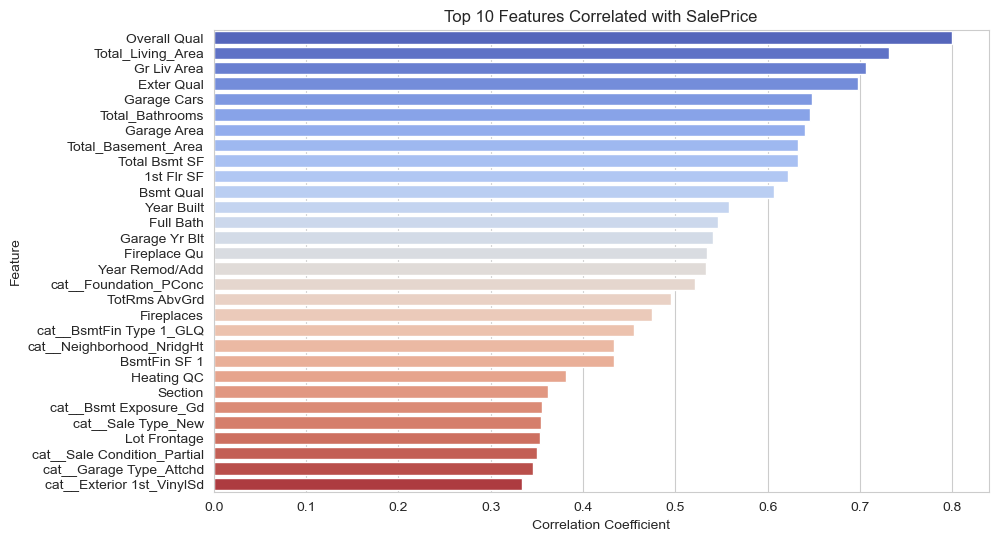

In [67]:
# Compute correlation with SalePrice
corr_matrix = df.corr()
# Exclude self-correlation
correlation_with_target = df.corr()["SalePrice"].drop("SalePrice")  

# Get top-most correlated features (positive & negative)
top_features = correlation_with_target.sort_values(ascending=False).head(30)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm", hue = None, legend = False)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_variance(feat1, feat2):
    features = df[[feat1, feat2]]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    
    return vif_data

In [69]:
check_variance('Gr Liv Area', 'Total_Living_Area')

,Feature,VIF
0,Gr Liv Area,20.286011
1,Total_Living_Area,20.286011


In [70]:
gr_living_corr = df[['Gr Liv Area', 'Total_Living_Area']].corr()
print(gr_living_corr)


                   Gr Liv Area  Total_Living_Area
Gr Liv Area           1.000000           0.787396
Total_Living_Area     0.787396           1.000000


In [71]:
bath_corr = df[['Full Bath', 'Total_Bathrooms']].corr()
print(porch_corr)

                 Full Bath  Total_Bathrooms
Full Bath         1.000000         0.851285
Total_Bathrooms   0.851285         1.000000


In [72]:
check_variance('Full Bath', 'Total_Bathrooms')

,Feature,VIF
0,Full Bath,31.444844
1,Total_Bathrooms,31.444844


### Removing `Gr Liv Area` and `Full Bath` due to Multicollinearity

During exploratory data analysis (EDA), we examined the correlation and variance inflation factor between `Gr Liv Area` (Above-Ground Living Area), `Total_Living_Area` (Total Finished Living Area) and `Full Bath`, `Total_Bathrooms`. 

- The correlation between these features is **0.787**, **0.85** indicating a high relationship.
- The **Variance Inflation Factor (VIF)** for both features is **20.29** and **31.44**, which is well above the threshold of **10**, confirming strong multicollinearity.
- Since `Total_Living_Area` already includes `Gr Liv Area`, keeping both would introduce redundancy.
- And since `Total_Bathrooms` already includes `Full Bath` it would also introduce redundancy.

  
**Decision:** We will drop `Gr Liv Area`, `Full Bath` for further analysis to improve model stability and interpretability.

In [73]:
df.drop(columns = ['Gr Liv Area', 'Full Bath'], inplace = True)

#### Printing the top 10 columns with highest positive/negative correlation

In [74]:
# Print the top 10 columns with positive/negative correlation
correlation_with_target = df.corr()["SalePrice"].drop("SalePrice")  
top_positive_corr = correlation_with_target[correlation_with_target > 0].sort_values(ascending=False).head(10)
top_negative_corr = correlation_with_target[correlation_with_target < 0].sort_values().head(10)

print("Top Positive Correlations:")
print(top_positive_corr)

print("\nTop Negative Correlations:")
print(top_negative_corr)

Top Positive Correlations:
Overall Qual           0.799262
Total_Living_Area      0.731478
Exter Qual             0.697970
Garage Cars            0.647562
Total_Bathrooms        0.646214
Garage Area            0.640138
Total Bsmt SF          0.632529
Total_Basement_Area    0.632529
1st Flr SF             0.621676
Bsmt Qual              0.607143
Name: SalePrice, dtype: float64

Top Negative Correlations:
cat__Garage Finish_Unf      -0.421876
cat__Garage Type_Detchd     -0.365074
cat__Foundation_CBlock      -0.349642
cat__MS Zoning_RM           -0.292590
cat__Bsmt Exposure_No       -0.282967
cat__Roof Style_Gable       -0.256250
Township                    -0.248572
cat__Garage Type_None       -0.225950
cat__Garage Finish_None     -0.225561
cat__Neighborhood_OldTown   -0.211944
Name: SalePrice, dtype: float64


### **Correlation Analysis:**

From this analysis, we can identify the columns' correlation with `SalePrice`:

#### **Positive Correlators:**
1. **`Overall Qual`**: This feature has the highest correlation with `SalePrice`. It makes sense that a higher quality house would sell at a higher price.
2. **`Total_Living_Area`**: This feature has a high correlation (0.73). The larger the living area, the higher the property’s price.
3. **`Exter Qual`**: This evaluates the quality of the material used on the exterior. A higher quality exterior typically means a more expensive house.
4. **`Garage Cars`**: This represents the garage capacity, meaning how many cars the garage can hold. A larger garage often correlates with a higher price.
5. **`Total_Bathrooms`**: The total number of bathrooms in a house is intuitive—more bathrooms usually lead to a higher price.
6. **`Garage Area`**: After checking the correlation and variance inflation factor (VIF), I plan to drop this column. Since `Garage Cars` has a higher correlation with `SalePrice`, both columns provide similar information.



#### **Negative Correlators:**
1. **`cat__Garage Finish_Unf`**: This represents the interior finish of the garage. An unfinished garage typically correlates with a lower sale price.
2. **`cat__Garage Type_Detchd`**: This indicates whether the garage is detached. Detached garages often correlate with a lower price because they are less desirable compared to attached garages.
3. **`cat__Foundation_CBlock`**: This refers to the type of foundation. The labels are as follows:
    - **PConc**: Poured Concrete (1310)
    - **CBlock**: Concrete Block (1244)
    - **BrkTil**: Brick Tile (311)
    - **Slab**: Slab (49)
    - **Stone**: Stone (11)
    - **Wood**: Wood (5)
    
    Poured concrete foundations (PConc) are more durable and resistant to cracking, so they should generally be associated with higher prices. The other materials, like **Wood** or **Stone**, are considered outdated and are often found in lower-priced homes.
4. **`cat__MS Zoning_RM`**: This refers to the general zoning classification of the property. Certain zoning types and neighborhoods tend to have higher prices, influencing the correlation with `SalePrice`.
5. **`cat__Bsmt Exposure_No`**: This feature describes how exposed the basement is. A less exposed basement typically leads to a higher price, while a more exposed basement may lead to a lower price.
